In [12]:
import numpy as np
import pandas as pd
import os
from sklearn.cluster import DBSCAN
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')

In [13]:
datapath = os.getcwd()
location_data_path = datapath + "/data/USA-Geolocated-tweets-free-dataset-Followthehashtag" #all excel sheets are in this folder
location_excel_path = location_data_path + '/usa_nativeretweets.xlsx'

In [14]:
xls = pd.ExcelFile(location_excel_path)
data = pd.read_excel(xls, 'Stream')
#print(data.shape)

In [15]:
# Get the latitude and logitude of the tweets
randomData = data.sample(50000)
coords = randomData.as_matrix(columns=['Latitude', 'Longitude'])

/home/rituparna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
randomData = randomData.drop(['Favs','RTs','Profile picture','Listed','Followers','Following'], axis = 1)

In [17]:
miles = .75
kilometers = miles / 0.621371
eps = kilometers / 100
print(eps)

# Run the DBSCAN from sklearn
db = DBSCAN(eps=eps, min_samples=5).fit(np.radians(coords))
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

# get the cluster
# cluster_labels = -1 means outliers
clusters = pd.Series([coords[cluster_labels == n] for n in range(-1, n_clusters)])
#clustersWithNoNoise = pd.Series([coords[cluster_labels == n] for n in range(0, n_clusters)])

#Check the clusters with more data and decide to analyze
for i in range(len(np.unique(db.labels_))):
    print("Cluster",i," lenth is ",len(clusters[i]))

print(clusters[3])

0.012070083734194225
Cluster 0  lenth is  230
Cluster 1  lenth is  33554
Cluster 2  lenth is  7870
Cluster 3  lenth is  11
Cluster 4  lenth is  715
Cluster 5  lenth is  3346
Cluster 6  lenth is  48
Cluster 7  lenth is  10
Cluster 8  lenth is  924
Cluster 9  lenth is  225
Cluster 10  lenth is  99
Cluster 11  lenth is  655
Cluster 12  lenth is  28
Cluster 13  lenth is  46
Cluster 14  lenth is  123
Cluster 15  lenth is  19
Cluster 16  lenth is  539
Cluster 17  lenth is  24
Cluster 18  lenth is  20
Cluster 19  lenth is  133
Cluster 20  lenth is  44
Cluster 21  lenth is  18
Cluster 22  lenth is  222
Cluster 23  lenth is  126
Cluster 24  lenth is  63
Cluster 25  lenth is  21
Cluster 26  lenth is  26
Cluster 27  lenth is  64
Cluster 28  lenth is  30
Cluster 29  lenth is  32
Cluster 30  lenth is  15
Cluster 31  lenth is  19
Cluster 32  lenth is  29
Cluster 33  lenth is  42
Cluster 34  lenth is  28
Cluster 35  lenth is  7
Cluster 36  lenth is  12
Cluster 37  lenth is  46
Cluster 38  lenth is  1

In [18]:
latitudeList = []
longitudeList = []
def getCoordsOfaCluster(cluster):
    for i in range(len(cluster)):
        latitudeList.append(cluster[i][0])
        longitudeList.append(cluster[i][1])

    #print("LatitudeList ::: ",latitudeList)
    #print("LongitudeList ::: ",longitudeList)

In [19]:
clusterToAnalyze = clusters[3]
getCoordsOfaCluster(clusterToAnalyze)

In [20]:
dataCluster = randomData[randomData['Latitude'].isin(latitudeList) & randomData['Longitude'].isin(longitudeList)]
#dataCluster = dataCluster[dataCluster.isin(longitudeList)]
dataCluster

,Tweet Id,Date,Hour,User Name,Nickname,Bio,TweetContent,Latitude,Longitude,Country,Place,Tweet language (ISO 639-1),Tweet Url
19751,721180540842287105,2016-04-16,03:36,bayli,bayliface,Just let it go ➵ just let it be✌️,Cute jazzy's date with this one ali_kw 💕 @ Jaz...,37.113004,-113.595388,US,"St George, UT",en,http://www.twitter.com/bayliface/status/721180...
131130,720935635691773952,2016-04-15,11:23,Saint George Weather,SaintGeorgeUT,"Weather updates, forecast, warnings and inform...",high wind warning in effect from noon today to...,37.109070,-113.583300,US,"St George, UT",en,http://www.twitter.com/SaintGeorgeUT/status/72...
202514,720566561962995712,2016-04-14,10:57,Alessandra Chiarlo,ALEssandra_CI,Nacqui 29 anni fa in un giovedì di Settembre. ...,Taking pictures of my Mr.W is an hard challeng...,37.371725,-113.254611,US,"Utah, USA",en,http://www.twitter.com/ALEssandra_CI/status/72...
118027,721002297363279874,2016-04-15,15:48,TMJ-UT Retail Jobs,tmj_ut_retail,Follow this account for geo-targeted Retail jo...,This #Retail #job might be a great fit for you...,37.115986,-113.545018,US,"St George, UT",en,http://www.twitter.com/tmj_ut_retail/status/72...
163315,720712254715478016,2016-04-14,20:36,Travis LaChance,TravLaChance,NaN,Vacation has finally began @ Zion National Par...,37.189147,-112.998236,US,"Utah, USA",en,http://www.twitter.com/TravLaChance/status/720...
65763,721120881188212736,2016-04-15,23:39,Glenn Webb,1GlennWebb,family man; musician/percussionist; soccer fan...,Me about to run my leg of the #greatrace @dix...,37.104366,-113.565694,US,"St George, UT",en,http://www.twitter.com/1GlennWebb/status/72112...
145220,720778702192160768,2016-04-15,01:00,Ciara Jackson,ciara_jacks,so there's that.,Happy birthday to my other half👯 Anyone who kn...,37.104200,-113.583000,US,"St George, UT",en,http://www.twitter.com/ciara_jacks/status/7207...
34696,721157996173254656,2016-04-16,02:07,Johnnybgoooooood,Jbgoooooood,You shouldn't take life too seriously. You'll ...,Damn that was good!! - Drinking a Dubhe Imperi...,37.179900,-113.006000,US,"Utah, USA",en,http://www.twitter.com/Jbgoooooood/status/7211...
68844,721116368347598848,2016-04-15,23:21,bayli,bayliface,Just let it go ➵ just let it be✌️,#einsteinbros #breakfast #thankyou #messyhair ...,37.052200,-113.598280,US,"St George, UT",es,http://www.twitter.com/bayliface/status/721116...
171174,720687742796066816,2016-04-14,18:58,Cyndi Smith,WebVixn,Web Management Junkie. Former WAHM now back in...,I'm at Kanarraville NB Rest Area in Cedar City...,37.513434,-113.211573,US,"Utah, USA",en,http://www.twitter.com/WebVixn/status/72068774...


In [21]:
#Getting the hashtags
dataCluster['Hashtags'] = dataCluster.TweetContent.str.findall(r'#.*?(?=\s|$)')

/home/rituparna/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
dataCluster

,Tweet Id,Date,Hour,User Name,Nickname,Bio,TweetContent,Latitude,Longitude,Country,Place,Tweet language (ISO 639-1),Tweet Url,Hashtags
19751,721180540842287105,2016-04-16,03:36,bayli,bayliface,Just let it go ➵ just let it be✌️,Cute jazzy's date with this one ali_kw 💕 @ Jaz...,37.113004,-113.595388,US,"St George, UT",en,http://www.twitter.com/bayliface/status/721180...,[]
131130,720935635691773952,2016-04-15,11:23,Saint George Weather,SaintGeorgeUT,"Weather updates, forecast, warnings and inform...",high wind warning in effect from noon today to...,37.109070,-113.583300,US,"St George, UT",en,http://www.twitter.com/SaintGeorgeUT/status/72...,[]
202514,720566561962995712,2016-04-14,10:57,Alessandra Chiarlo,ALEssandra_CI,Nacqui 29 anni fa in un giovedì di Settembre. ...,Taking pictures of my Mr.W is an hard challeng...,37.371725,-113.254611,US,"Utah, USA",en,http://www.twitter.com/ALEssandra_CI/status/72...,[]
118027,721002297363279874,2016-04-15,15:48,TMJ-UT Retail Jobs,tmj_ut_retail,Follow this account for geo-targeted Retail jo...,This #Retail #job might be a great fit for you...,37.115986,-113.545018,US,"St George, UT",en,http://www.twitter.com/tmj_ut_retail/status/72...,"[#Retail, #job, #StGeorge,, #Hiring, #CareerArc]"
163315,720712254715478016,2016-04-14,20:36,Travis LaChance,TravLaChance,NaN,Vacation has finally began @ Zion National Par...,37.189147,-112.998236,US,"Utah, USA",en,http://www.twitter.com/TravLaChance/status/720...,[]
65763,721120881188212736,2016-04-15,23:39,Glenn Webb,1GlennWebb,family man; musician/percussionist; soccer fan...,Me about to run my leg of the #greatrace @dix...,37.104366,-113.565694,US,"St George, UT",en,http://www.twitter.com/1GlennWebb/status/72112...,[#greatrace]
145220,720778702192160768,2016-04-15,01:00,Ciara Jackson,ciara_jacks,so there's that.,Happy birthday to my other half👯 Anyone who kn...,37.104200,-113.583000,US,"St George, UT",en,http://www.twitter.com/ciara_jacks/status/7207...,[]
34696,721157996173254656,2016-04-16,02:07,Johnnybgoooooood,Jbgoooooood,You shouldn't take life too seriously. You'll ...,Damn that was good!! - Drinking a Dubhe Imperi...,37.179900,-113.006000,US,"Utah, USA",en,http://www.twitter.com/Jbgoooooood/status/7211...,[#photo]
68844,721116368347598848,2016-04-15,23:21,bayli,bayliface,Just let it go ➵ just let it be✌️,#einsteinbros #breakfast #thankyou #messyhair ...,37.052200,-113.598280,US,"St George, UT",es,http://www.twitter.com/bayliface/status/721116...,"[#einsteinbros, #breakfast, #thankyou, #messyh..."
171174,720687742796066816,2016-04-14,18:58,Cyndi Smith,WebVixn,Web Management Junkie. Former WAHM now back in...,I'm at Kanarraville NB Rest Area in Cedar City...,37.513434,-113.211573,US,"Utah, USA",en,http://www.twitter.com/WebVixn/status/72068774...,[]


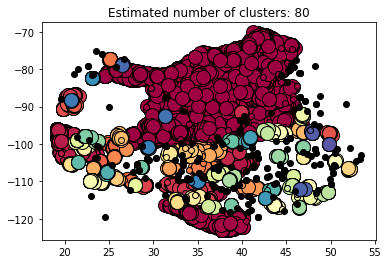

In [23]:
unique_labels = set(cluster_labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
         #Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (cluster_labels == k)

    xy = coords[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = coords[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

In [26]:
document = dataCluster['TweetContent']

11
